In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ushape.csv to ushape.csv


In [3]:
df= pd.read_csv('ushape.csv')

In [4]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [5]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

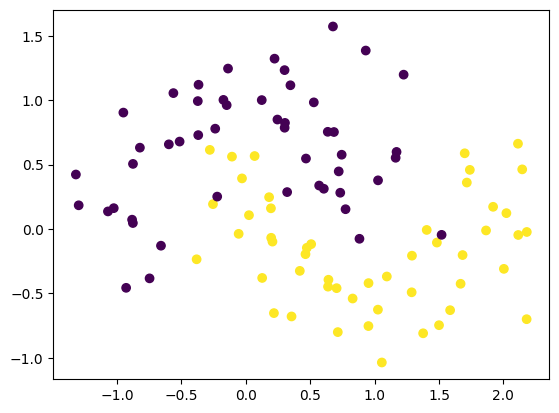

In [6]:
plt.scatter(x[:,0], x[:,1], c=y)

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))

model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Set parameters to 0
model.get_weights()

[array([[0.31628776, 0.66796696],
        [0.25257814, 0.03777802]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.19407678,  0.90654695],
        [-0.71570146, -0.97850204]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.64093786,  1.1850334 ],
        [ 0.11591363,  0.0946101 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.9888996 , -0.90350544],
        [ 0.62162983,  0.9789785 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.13363588],
        [ 0.6969243 ]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[ 0.7317688 , -1.2965347 ],
        [ 1.1421511 , -0.01510545]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-2.076596  , -0.67055154],
        [-2.0900216 , -0.51918817]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.3326221 , -0.80258256],
        [-0.39656898,  1.2475802 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[2.422055  , 0.10211954],
        [0.45333773, 0.39346308]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00478616],
        [-0.4028739 ]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.7523 - loss: 0.6794 - val_accuracy: 0.8500 - val_loss: 0.6714
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7845 - loss: 0.6786 - val_accuracy: 0.8500 - val_loss: 0.6699
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7845 - loss: 0.6765 - val_accuracy: 0.8500 - val_loss: 0.6685
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7587 - loss: 0.6766 - val_accuracy: 0.8500 - val_loss: 0.6670
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7508 - loss: 0.6755 - val_accuracy: 0.8500 - val_loss: 0.6655
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7587 - loss: 0.6744 - val_accuracy: 0.8500 - val_loss: 0.6641
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7806 - loss: 0.6725 - val_accuracy: 0.8500 - val_loss: 0.6626
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7376 - loss: 0.6732 - val_accuracy: 0.8500 - val_loss

In [17]:
model.get_weights()

[array([[ 0.5918692 , -1.0036875 ],
        [ 1.3424305 ,  0.32049266]], dtype=float32),
 array([-0.05161963,  0.17199115], dtype=float32),
 array([[-2.0370252 , -0.43278074],
        [-2.295373  , -0.30181524]], dtype=float32),
 array([0.02610948, 0.01727735], dtype=float32),
 array([[-0.6820499 , -1.1168509 ],
        [-0.69435763,  0.9589572 ]], dtype=float32),
 array([-0.05733161,  0.01190497], dtype=float32),
 array([[2.7812107 , 0.4235188 ],
        [0.8128558 , 0.73770845]], dtype=float32),
 array([-0.04865677, -0.0248974 ], dtype=float32),
 array([[-0.296779 ],
        [-0.7700815]], dtype=float32),
 array([0.04054817], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

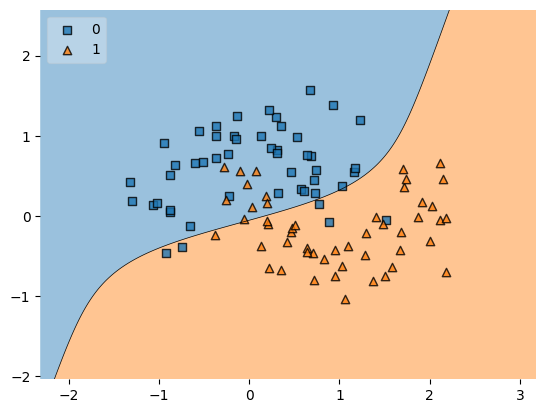

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)